In [1]:
import os
os.chdir('C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P')

In [2]:
#### Analysis rsp alcohol competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from function_randomness import randomness_sequence
from function_randomness_old import randomness_old



In [3]:
os.chdir('C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P\\results')
os.listdir()

for idx, file in enumerate(os.listdir()):
    print(idx, file)

0 0_yerko_Tiff.xlsx
1 1 _Rocio_Heike.xlsx
2 1_alba_david.xlsx
3 1_Cris_Amanda.xlsx
4 1_genis_jordi.xlsx
5 1_jaime_vicky.xlsx
6 1_lejla_anna.xlsx
7 1_lluis_david.xlsx
8 1_lluis_joao.xlsx
9 1_lluis_klaus.xlsx
10 1_pablo_jorge.xlsx
11 2_anna_jordi.xlsx
12 2_lluis_klaus.xlsx
13 2_Pablo_Jaime.xlsx
14 2_vicky_jorge.xlsx


### Load the files into one DataFrame

In [20]:
#root_save = os.getcwd() + '\\results\\' 
#os.chdir(root_save)

os.listdir()

frames = []
for idx, file in enumerate(os.listdir()):
    df_s = pd.read_excel(file)
    df_s['rounds'] = idx
    randomness_p1 =  round(randomness_sequence(list(df_s['resp1'].values) )[0], 3) 
    randomness_p2 =  round(randomness_sequence(list(df_s['resp2'].values) )[0], 3) 
    #randomness_p1 =  round(randomness_old(list(df_s['resp1'].values) ), 3) 
    #randomness_p2 =  round(randomness_old(list(df_s['resp2'].values) ), 3)     
    df_s['randomness_p1']=randomness_p1
    df_s['randomness_p2']=randomness_p2
    frames.append(df_s)

df = pd.concat(frames, ignore_index=True)
df.head(10)


,player1,player2,resp1,resp2,result,winner_round,b_p1,b_p2,repetition,p1_lik_1,...,p2_lik_21,p1_lik_22,p2_lik_22,p1_lik_23,p2_lik_23,p1_lik_24,p2_lik_24,rounds,randomness_p1,randomness_p2
0,yerko,Tiff,p,r,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
1,yerko,Tiff,s,p,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
2,yerko,Tiff,s,r,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
3,yerko,Tiff,p,s,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
4,yerko,Tiff,s,p,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
5,yerko,Tiff,r,p,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
6,yerko,Tiff,p,s,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
7,yerko,Tiff,s,s,draw,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
8,yerko,Tiff,s,p,yerko,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166
9,yerko,Tiff,s,r,Tiff,yerko,3,3,0,0.000665,...,1.227084e-18,1.430363e-19,1.430363e-19,1.663665e-20,1.663665e-20,1.931154e-21,1.931154e-21,0,1.14,1.166


### Correlation beer consumption and randomness ?

In [21]:
df.repetition.unique()

array([0, 1, 2], dtype=int64)

In [22]:
df['rounds'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [23]:
#sum(df[df['randomness_p1']>50]['resp1']=='r')
print( df[df['player1']=='lluis']['randomness_p1'].unique() )

print( df[df['player1']=='lluis']['b_p1'].unique() )

[0.814 1.325 1.071 1.205]
[6 7 4 5]


In [28]:
df_b_r
df_b_r = df_b_r[ df_b_r['rand']> df_b_r['rand'].mean() - 1.96*df_b_r['rand'].std() ]
df_b_r

,beer,rand
0,3,1.140
1,3,1.166
2,1,1.367
3,5,1.640
4,0,1.040
5,0,1.211
7,5,1.734
8,6,1.717
9,3,1.190
10,1,1.644


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


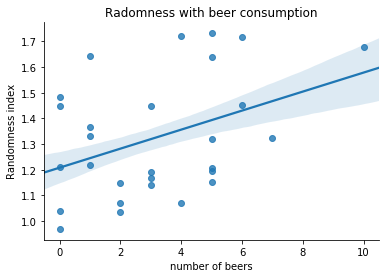

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4.907
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0357
Time:                        18:02:44   Log-Likelihood:                 3.7267
No. Observations:                  28   AIC:                            -3.453
Df Residuals:                      26   BIC:                           -0.7889
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2077      0.068     17.880      0.0

In [29]:
sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


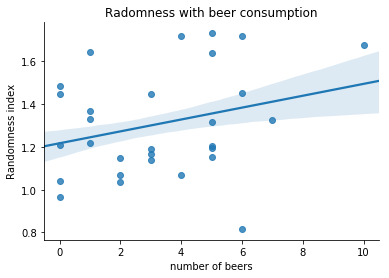

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.330
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.139
Time:                        18:00:16   Log-Likelihood:                0.79480
No. Observations:                  29   AIC:                             2.410
Df Residuals:                      27   BIC:                             5.145
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2170      0.075     16.254      0.0

In [24]:

beer_n = []
r_value=[]
winner=[]

for r in df['rounds'].unique():
    r_value.append(df.loc[df['rounds']==r,'randomness_p1'].iloc[0])
    r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})

df_b_r = df_b_r[ df_b_r['rand']> df_b_r['rand'].mean() - 1.96*df_b_r['rand'].std() ]

df_b_r = df_b_r[ df_b_r['rand']< df_b_r['rand'].mean() + 1.96*df_b_r['rand'].std() ]


sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())

In [26]:
df_b_r['rand']>df_b_r['rand'].mean() - 1.96*df_b_r['rand'].std() 

0      True
1      True
2      True
3      True
4      True
5      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
Name: rand, dtype: bool

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


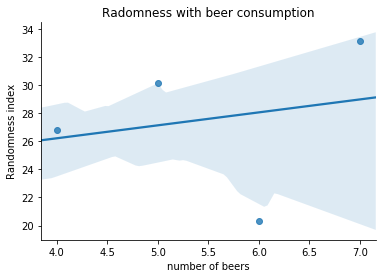

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.429
Method:                 Least Squares   F-statistic:                   0.09894
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.783
Time:                        17:48:51   Log-Likelihood:                -11.808
No. Observations:                   4   AIC:                             27.62
Df Residuals:                       2   BIC:                             26.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5207     16.444      1.370      0.3

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [30]:

## lluis
beer_n = []
r_value=[]
winner=[]

df_lluis = df.loc[df['player1']=='lluis']
for r in df_lluis['rounds'].unique():
    r_value.append(df_lluis.loc[df_lluis['rounds']==r,'randomness_p1'].iloc[0])
    #r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
    beer_n.append(df_lluis.loc[df_lluis['rounds']==r, 'b_p1'].iloc[0])
    #beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})
sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


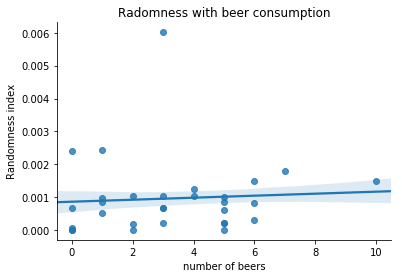

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.1209
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.731
Time:                        17:49:07   Log-Likelihood:                 160.87
No. Observations:                  30   AIC:                            -317.7
Df Residuals:                      28   BIC:                            -314.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.000      2.422      0.0

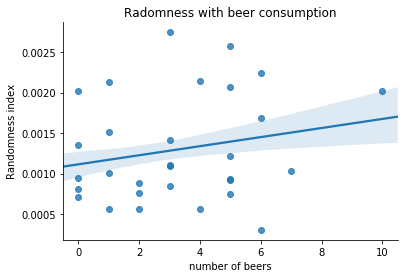

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.308
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.262
Time:                        17:49:08   Log-Likelihood:                 178.30
No. Observations:                  30   AIC:                            -352.6
Df Residuals:                      28   BIC:                            -349.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.000      5.569      0.0

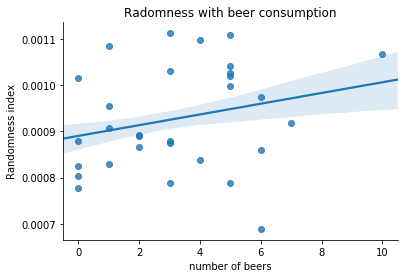

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.910
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.178
Time:                        17:49:09   Log-Likelihood:                 231.21
No. Observations:                  30   AIC:                            -458.4
Df Residuals:                      28   BIC:                            -455.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009   3.43e-05     25.962      0.0

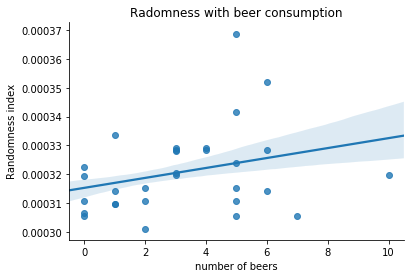

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.627
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.116
Time:                        17:49:09   Log-Likelihood:                 293.13
No. Observations:                  30   AIC:                            -582.3
Df Residuals:                      28   BIC:                            -579.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   4.35e-06     72.439      0.0

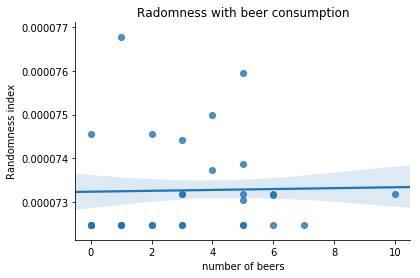

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.01393
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.907
Time:                        17:49:10   Log-Likelihood:                 368.64
No. Observations:                  30   AIC:                            -733.3
Df Residuals:                      28   BIC:                            -730.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.323e-05   3.51e-07    208.523      0.0

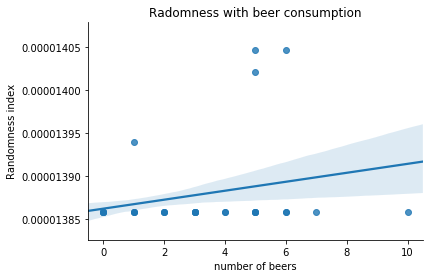

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.591
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.218
Time:                        17:49:10   Log-Likelihood:                 459.69
No. Observations:                  30   AIC:                            -915.4
Df Residuals:                      28   BIC:                            -912.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.386e-05   1.69e-08    820.873      0.0

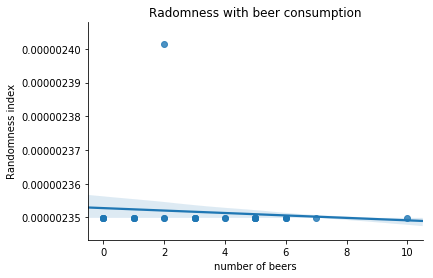

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.2606
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.614
Time:                        17:49:11   Log-Likelihood:                 512.52
No. Observations:                  30   AIC:                            -1021.
Df Residuals:                      28   BIC:                            -1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.353e-06    2.9e-09    810.797      0.0

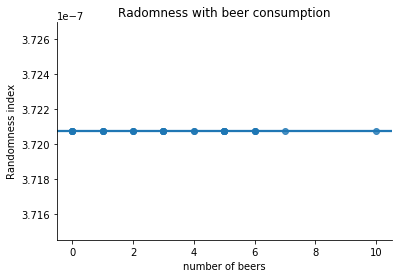

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.471
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:11   Log-Likelihood:                 916.34
No. Observations:                  30   AIC:                            -1829.
Df Residuals:                      28   BIC:                            -1826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.721e-07   4.14e-15   8.99e+07      0.0

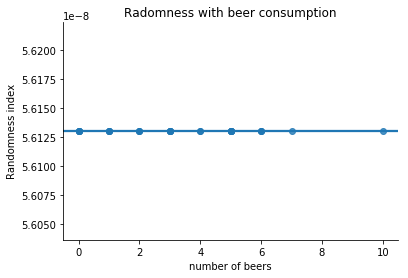

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.471
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:12   Log-Likelihood:                 1038.0
No. Observations:                  30   AIC:                            -2072.
Df Residuals:                      28   BIC:                            -2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.613e-08   7.16e-17   7.84e+08      0.0

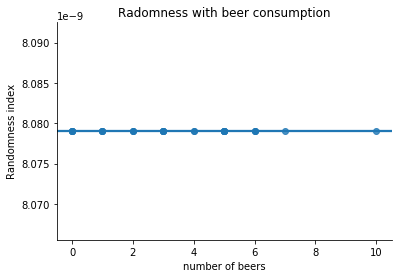

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.471
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:12   Log-Likelihood:                 1161.3
No. Observations:                  30   AIC:                            -2319.
Df Residuals:                      28   BIC:                            -2316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.079e-09   1.18e-18   6.87e+09      0.0

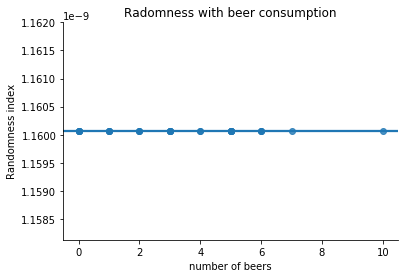

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.471
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:13   Log-Likelihood:                 1284.2
No. Observations:                  30   AIC:                            -2564.
Df Residuals:                      28   BIC:                            -2562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.16e-09   1.95e-20   5.94e+10      0.0

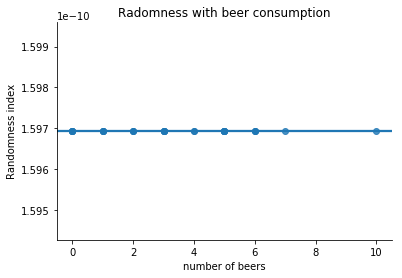

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.471
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:13   Log-Likelihood:                 1408.8
No. Observations:                  30   AIC:                            -2814.
Df Residuals:                      28   BIC:                            -2811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.597e-10   3.08e-22   5.19e+11      0.0

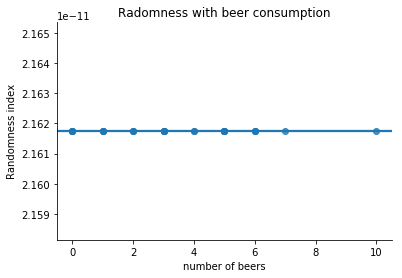

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.471
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:14   Log-Likelihood:                 1533.7
No. Observations:                  30   AIC:                            -3063.
Df Residuals:                      28   BIC:                            -3061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.162e-11   4.78e-24   4.52e+12      0.0

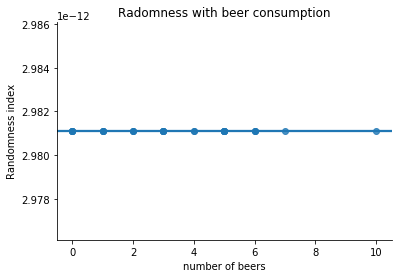

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.473
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0267
Time:                        17:49:14   Log-Likelihood:                 1657.5
No. Observations:                  30   AIC:                            -3311.
Df Residuals:                      28   BIC:                            -3308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.981e-12   7.71e-26   3.87e+13      0.0

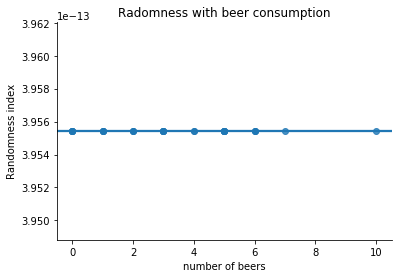

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.489
Date:                Fri, 15 Mar 2019   Prob (F-statistic):             0.0265
Time:                        17:49:15   Log-Likelihood:                 1783.1
No. Observations:                  30   AIC:                            -3562.
Df Residuals:                      28   BIC:                            -3559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.955e-13   1.17e-27   3.38e+14      0.0

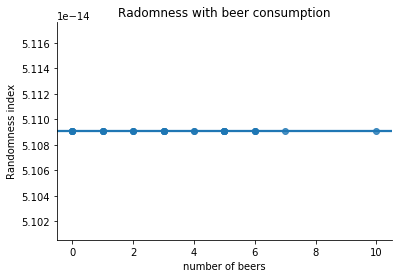

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.267
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.143
Time:                        17:49:15   Log-Likelihood:                 1910.2
No. Observations:                  30   AIC:                            -3816.
Df Residuals:                      28   BIC:                            -3814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.109e-14   1.69e-29   3.02e+15      0.0

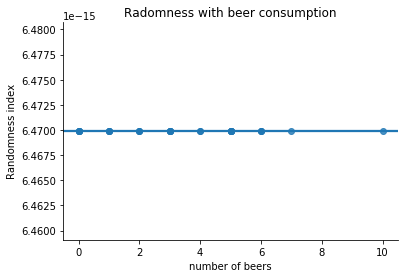

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -1.819
Model:                            OLS   Adj. R-squared:                 -1.920
Method:                 Least Squares   F-statistic:                    -18.07
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        17:49:16   Log-Likelihood:                 2008.2
No. Observations:                  30   AIC:                            -4012.
Df Residuals:                      28   BIC:                            -4010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.47e-15   6.47e-31      1e+16      0.0

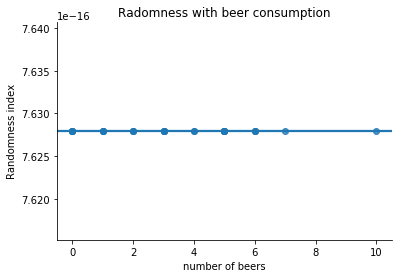

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        17:49:17   Log-Likelihood:                 2072.3
No. Observations:                  30   AIC:                            -4141.
Df Residuals:                      28   BIC:                            -4138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.628e-16   7.63e-32      1e+16      0.0

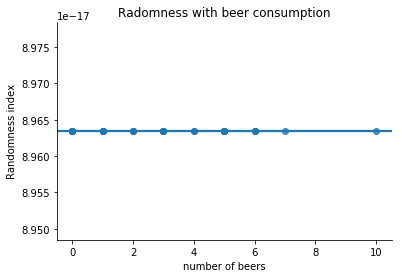

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     21.61
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           7.25e-05
Time:                        17:49:17   Log-Likelihood:                 2134.4
No. Observations:                  30   AIC:                            -4265.
Df Residuals:                      28   BIC:                            -4262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.963e-17   9.62e-33   9.32e+15      0.0

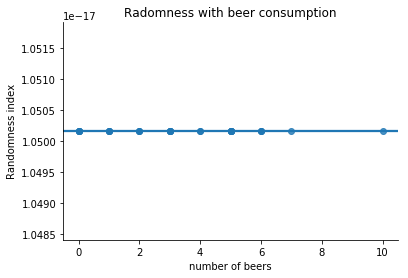

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     8.522
Date:                Fri, 15 Mar 2019   Prob (F-statistic):            0.00685
Time:                        17:49:18   Log-Likelihood:                 2207.2
No. Observations:                  30   AIC:                            -4410.
Df Residuals:                      28   BIC:                            -4408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e-17    8.5e-34   1.24e+16      0.0

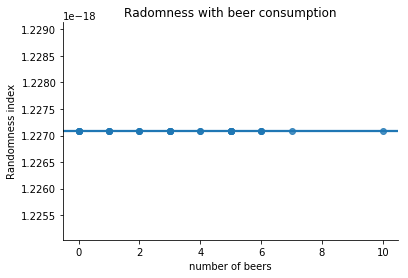

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        17:49:18   Log-Likelihood:                 2259.4
No. Observations:                  30   AIC:                            -4515.
Df Residuals:                      28   BIC:                            -4512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.227e-18   1.49e-34   8.23e+15      0.0

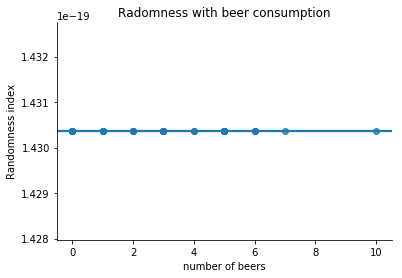

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -1.058
Model:                            OLS   Adj. R-squared:                 -1.132
Method:                 Least Squares   F-statistic:                    -14.40
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        17:49:19   Log-Likelihood:                 2317.2
No. Observations:                  30   AIC:                            -4630.
Df Residuals:                      28   BIC:                            -4628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.43e-19   2.18e-35   6.57e+15      0.0

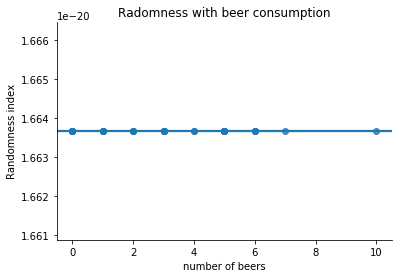

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -0.100
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    -2.545
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        17:49:19   Log-Likelihood:                 2409.7
No. Observations:                  30   AIC:                            -4815.
Df Residuals:                      28   BIC:                            -4813.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.664e-20   9.94e-37   1.67e+16      0.0

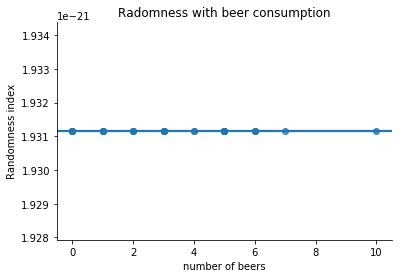

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               1.00
Time:                        17:49:20   Log-Likelihood:                 2472.1
No. Observations:                  30   AIC:                            -4940.
Df Residuals:                      28   BIC:                            -4937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.931e-21   1.24e-37   1.55e+16      0.0

In [31]:

probs_1 = ['p1_lik_1', 'p1_lik_2', 'p1_lik_3', 'p1_lik_4', 'p1_lik_5', 'p1_lik_6', 'p1_lik_7','p1_lik_8','p1_lik_9',
           'p1_lik_10', 'p1_lik_11', 'p1_lik_12', 'p1_lik_13', 'p1_lik_14', 'p1_lik_15', 'p1_lik_16', 'p1_lik_17', 
            'p1_lik_18', 'p1_lik_19', 'p1_lik_20', 'p1_lik_21', 'p1_lik_22', 'p1_lik_23', 'p1_lik_24']

probs_2 = ['p2_lik_1', 'p2_lik_2', 'p2_lik_3', 'p2_lik_4', 'p2_lik_5', 'p2_lik_6', 'p2_lik_7','p2_lik_8','p2_lik_9',
           'p2_lik_10', 'p2_lik_11', 'p2_lik_12', 'p2_lik_13', 'p2_lik_14', 'p2_lik_15', 'p2_lik_16', 'p2_lik_17', 
            'p2_lik_18', 'p2_lik_19', 'p2_lik_20', 'p2_lik_21', 'p2_lik_22', 'p2_lik_23', 'p2_lik_24']


           
for probs in range(0, len(probs_1)):
    ##         
    beer_n = []
    r_value=[]
    winner=[]

    for r in df['rounds'].unique():
        r_value.append(df.loc[df['rounds']==r, probs_1[probs]].iloc[0])
        r_value.append(df.loc[df['rounds']==r, probs_2[probs]].iloc[0])
        beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



    df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})
    sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
    plt.title('Radomness with beer consumption')
    plt.xlabel('number of beers')
    plt.ylabel('Randomness index')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()


    #ols
    mod = ols('rand ~ beer', data=df_b_r).fit()
    print(mod.summary())

## Is beeing random a good strategy to win?

In [30]:
v1 = df.loc[df['rounds']==r, 'randomness_p1'].iloc[0]
v2 = df.loc[df['rounds']==r, 'randomness_p2'].iloc[0]

np.mean([v1, v2])
#print(v1, v2)

1.26

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


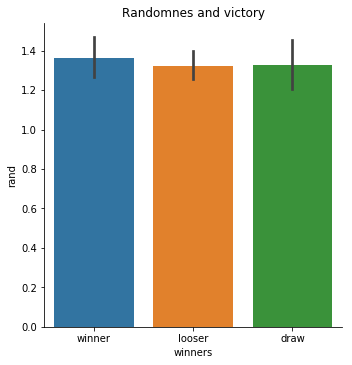

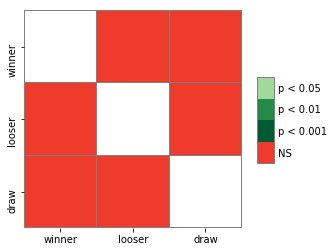

        winner  looser  draw
winner    -1.0     0.9   0.9
looser     0.9    -1.0   0.9
draw       0.9     0.9  -1.0


In [31]:
### I create a draw mean value by combing bothe the random value and beer consumption of the participants

w_r_value=[]
l_r_value=[]
d_r_value=[]

w_b=[]
l_b=[]
d_b=[]


for r in df['rounds'].unique():
    win = df.loc[df['rounds']==r, 'winner_round'].iloc[0]
    if win == df.loc[df['rounds']==r, 'player1'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'randomness_p1'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  
    elif win == df.loc[df['rounds']==r, 'player2'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'randomness_p1'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    else: ## draw
        d_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0] ) 
        d_r_value.append( df.loc[df['rounds']==r, 'randomness_p1'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0] )

        

### Dataframe for each    
df_win = pd.DataFrame({'beer': w_b, 'rand': w_r_value})
df_win['winners'] = 'winner'
df_l = pd.DataFrame({'beer': l_b, 'rand': l_r_value})
df_l['winners'] = 'looser'
df_d = pd.DataFrame({'beer': d_b, 'rand': d_r_value})
df_d['winners'] = 'draw'
#concatenate them
df_w_l=pd.concat([df_win, df_l, df_d], ignore_index=True)

#Difference in mean randomness?
sns.factorplot(x='winners', y='rand', data=df_w_l, kind='bar', ci=68)
plt.title('Randomnes and victory')
plt.show()

#mod = ols('rand ~ winners', data=df_w_l).fit()
#print(mod.summary())

pc = sp.posthoc_tukey(df_w_l, val_col='rand', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
print(pc)


### Is drinking a goos strategy?

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


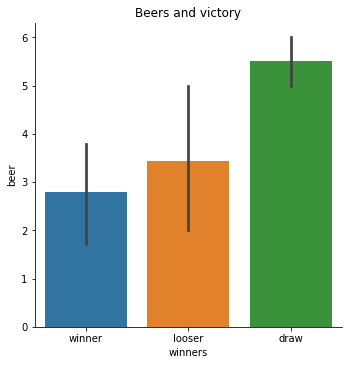

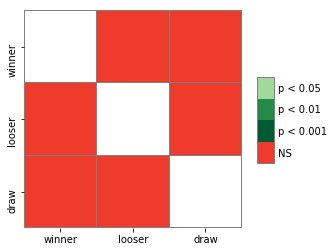

,winner,looser,draw
winner,-1.000000,0.759002,0.332333
looser,0.759002,-1.000000,0.519981
draw,0.332333,0.519981,-1.000000


In [32]:
#Difference in mean randomness?
sns.factorplot(x='winners', y='beer', data=df_w_l, kind='bar')
plt.title('Beers and victory')
plt.show()

pc = sp.posthoc_tukey(df_w_l, val_col='beer', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
pc

In [33]:

## Dimple regression model where we try to explain randomness as a function of beer consumption and as a winning strategy
mod = ols('rand ~ beer * C(winners)', data=df_w_l).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.9101
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.491
Time:                        18:06:32   Log-Likelihood:                -4.6597
No. Observations:                  30   AIC:                             21.32
Df Residuals:                      24   BIC:                             29.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [34]:
df_w_l['win']=(df_w_l['winners']=='winner')*1
mod = ols('win ~ beer', data=df_w_l).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9783
Date:                Fri, 15 Mar 2019   Prob (F-statistic):              0.331
Time:                        18:06:36   Log-Likelihood:                -21.192
No. Observations:                  30   AIC:                             46.38
Df Residuals:                      28   BIC:                             49.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5890      0.155      3.812      0.0